In [ ]:
import pandas as pd
import glob
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Modificación y limpieza de base de datos agrupaciones Filial

**Se llama la base se agrupa y se agregan nuevas columnas para realizar las debidas agrupaciones de lluvia, ventas propocionados por la empresa y lluvia**

In [ ]:
#Base con los datos proporcionados por la empresa 
# path =('/content/drive/MyDrive/DATATHON_DSC/DATA_FULL/SalesTotalGas_SahoryII.csv', low_memory=False, index_col=False, thousands=',',encoding='latin-1')
Sales=pd.read_csv('/content/drive/MyDrive/DATATHON_DSC/DATA_FULL/SalesTotalGas_SahoryII.csv', low_memory=False, index_col=False, thousands=',',encoding='latin-1')
Sales['mm']= pd.DatetimeIndex(Sales['KeyFecha']).month
Sales['yy'] = pd.to_datetime(Sales['KeyFecha']).dt.year
Sales.head()

dataII=Sales.groupby(['Filial'], as_index=False).agg({'Litros':'sum','PrecioGas':'sum','Venta':'sum'})
dataII.head()
#TEMPERATURA

path2 =r'/content/drive/MyDrive/DATATHON_DSC/DATA_FULL/SalesTotalbyMonth_withTemperature.csv'
tempe=pd.read_csv(path2)
tempe['mm']= pd.DatetimeIndex(tempe['KeyFecha']).month
tempe['yy'] = pd.to_datetime(tempe['KeyFecha']).dt.year
tempe.head()

data1=tempe.groupby(['Filial'], as_index=False).agg({'Temperatura':'mean','Venta':'sum','Litros':'sum'})
data1.head()

#LLUVIA
path8 =r'/content/drive/MyDrive/DATATHON_DSC/DATA_FULL/SalesTotalbyMonth_withTemperature_Rain.csv'
lluvias=pd.read_csv(path8)
lluvias['mes']= pd.DatetimeIndex(lluvias['KeyFecha']).month
lluvias['año'] = pd.to_datetime(lluvias['KeyFecha']).dt.year
lluvias.rename(columns = {'Filial':'Filial_II' }, inplace = True)
lluvias.head()
data_lluvias=lluvias.groupby(['Filial_II'], as_index=False).agg({'Lluvia':'mean'})
data_lluvias.head()


**se unen todas y se realiza las graficas siguientes este proceso se realizo también para las agrupaciones mensuales pero desde el notebook de jupyter local**

In [ ]:
result = pd.concat([df, data1, Sales_mes], axis=1, join='inner')
result.head()

#Correlaciones por filial

###En la siguiente celda se esta llamando la base de datos trabajada, filtrada y agrupada por filial donde contiene los datos de la venta y litros proporcionados por la empresa, se cálculo el precio del gas con el cociente de ambas y se ha añadido la temperatura promedio y lluvia promedio como variables para revisar sus correlaciones de como pueden afectar las ventas.

In [ ]:

dataa= pd.read_csv('/content/drive/MyDrive/DATATHON_DSC/Group_byfilial/Corrbyfilial.csv', low_memory=False, index_col=False, thousands=',',encoding='latin-1')

## Visualización de datos
### **En la siguiente celda se visualizan los datos**

In [ ]:
dataa.head()

,Temperatura,Lluvia,Litros,PrecioGas,Venta
0,23.148333,123.405000,6748829.0,5.681819e+06,65703452.0
1,19.153333,34.771667,1489780.0,3.040073e+06,15537270.0
2,22.543333,43.725000,4455771.0,5.314588e+06,42047231.0
3,15.570000,57.475000,1221545.0,8.925873e+05,10151649.0
4,25.006667,54.918333,4228769.0,4.155237e+06,41911408.0


### Se grafica la matrix de correlaciones con la biblioteca .sns con esto podemos ver la relación de -1 a 1 si se tiene un color de 0 no existe relacion en la variables.

#### **En la siguiente celda se gráfica**

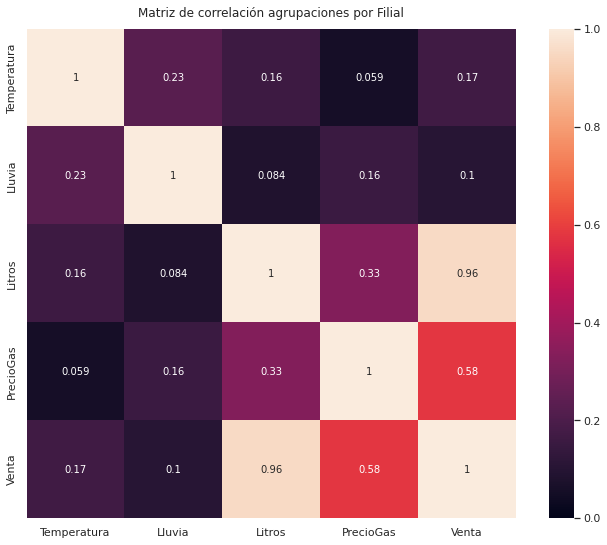

In [ ]:
corrmat = abs(dataa.corr())
f, ax = plt.subplots(figsize=(12, 9))
ht=sns.heatmap(corrmat, vmin=0, vmax=1, square=True, annot=True);
ht.set_title('Matriz de correlación agrupaciones por Filial', fontdict={'fontsize':12}, pad=12);

La siguiente celda es la misma gráfica con otra forma de visualización de datos.

Y en la siguiente gráfica de puede observar la correlación de las variable dadas por la empresa y las dos que analizamos por Filial, temperatura y lluvia. Vemos su correlación respecto a la venta. Se puede ver la relación entre esta, la temperatura y se relaciona mejor con la lluvia.

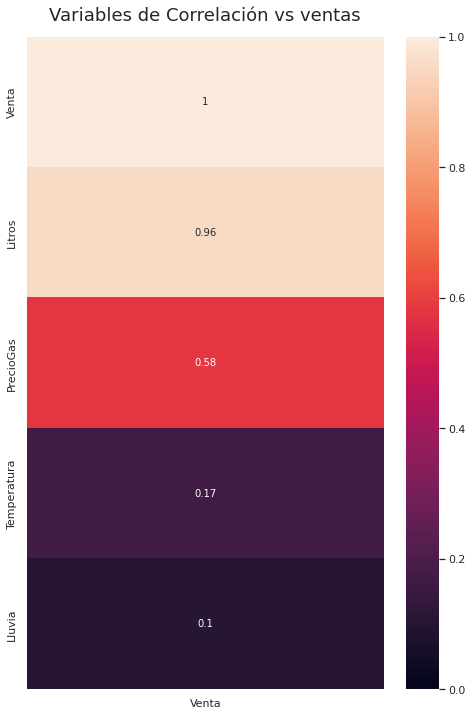

In [ ]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(corrmat[['Venta']].sort_values(by='Venta', ascending=False), vmin=0, vmax=1, annot=True)
heatmap.set_title('Variables de Correlación vs ventas', fontdict={'fontsize':18}, pad=16);

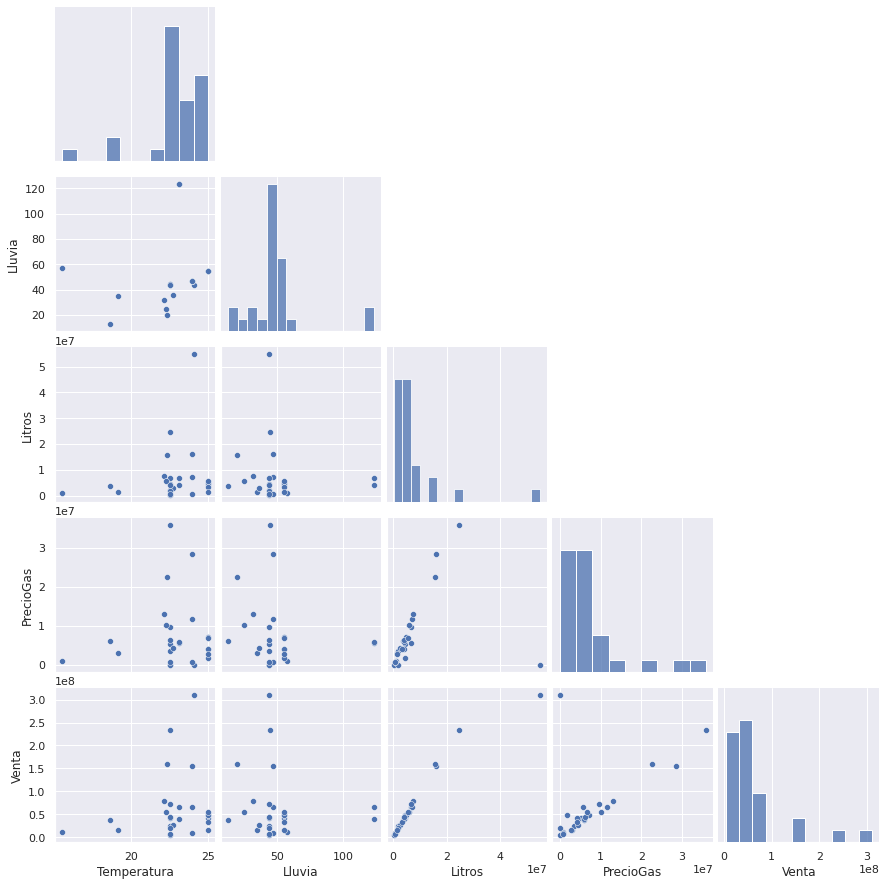

In [ ]:
sns.pairplot(dataa,corner=True)

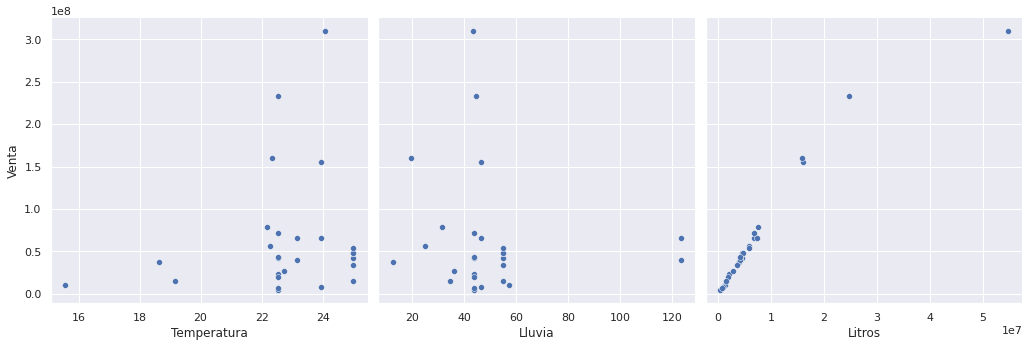

In [ ]:
pp = sns.pairplot(dataa,y_vars=['Venta'],x_vars=['Temperatura', 'Lluvia', 'Litros'])
pp.fig.set_size_inches(15,6)

### Otra forma en la que se puede ver si existe o no la correlacion entre las variables es con el ploteo, esto ayuda para elegir el modelo predictivo que mejor se adapte a la correlacion.

#### **En la siguiente celda se compila estas gráficas**

### Veamos que existe una correlacion lineal entre las variables de litros, precio gas y venta. Además existe una correlacion de la temperatura como ya se espera y además se encontró que otro fénomeno que afecta la venta del gas es la lluvia y tiene mejor correlación que la temperatura.  

# Agrupaciones y variables mensuales

En la siguiente celda se esta llamando la base de datos trabajada, filtrada y agrupada por mes donde contiene los datos de la venta y litros proporcionados por la empresa, se cálculo el precio del gas con el cociente de ambas y se ha añadido nuevas variables:GasLpab que los litros de gas que se importan mensualmente, y el número de estas importaciones respecto a las importaciones total de hidrocarburos denotada como %ImportVsGasLpab.
La otra varible que se estudío fue INCP es el índicde nacional de precios al consumidor, el cierre del dollar por mes (dollar) y el cierre de materias primas en EU (Close_USCI), como motivación se elegieron estos datos dado que sabemos que la mayor parte del gas es proporcionado por EU.
También se añade la temperatura y lluvia pero agrupadas por mes.

El objetivo es ver como se correlaciona estos datos con el precio de gas y así mismo se sabe que el precio del gas esta correlacionado linealmente con las ventas.

**En la siguiente celda se manda a llamar la base de datos agrupada por mes**

In [ ]:
dataaII= pd.read_csv('/content/drive/MyDrive/DATATHON_DSC/Group_byfilial/Corrbymes.csv', low_memory=False, index_col=False, thousands=',',encoding='latin-1')

**Se visualiza los datos**

In [ ]:
dataaII.rename(columns = {'mm':'mes','yy':'año' }, inplace = True)
dataaII.head()

,Lluvia,Temperatura,mes,año,Litros,PrecioGas,Venta,GasLPab,%ImporVSGas,INCP,Close_USCI,dollar
0,9.579167,17.966667,1,2017,8395286.0,2.639668e+06,54709601.0,36.333954,3.858057,93.258668,40.270000,21.209999
1,25.513043,13.686957,1,2018,7596855.0,3.980515e+06,59469531.0,52.912743,8.469578,99.881308,40.660000,20.354162
2,23.671429,15.976190,1,2019,2544190.0,3.548810e+06,23837139.0,91.059418,8.737358,106.131563,39.160000,18.744143
3,23.638095,17.380952,1,2020,2532046.0,3.200172e+06,22069862.0,34.255273,4.445067,108.335004,38.360001,18.996960
4,18.590909,16.545455,1,2021,2540236.0,4.509944e+06,27360021.0,70.599161,8.439077,111.177193,38.250000,18.669201


**Se gráfica la correlación de las variables con ayudad de la biblioteca .sns**

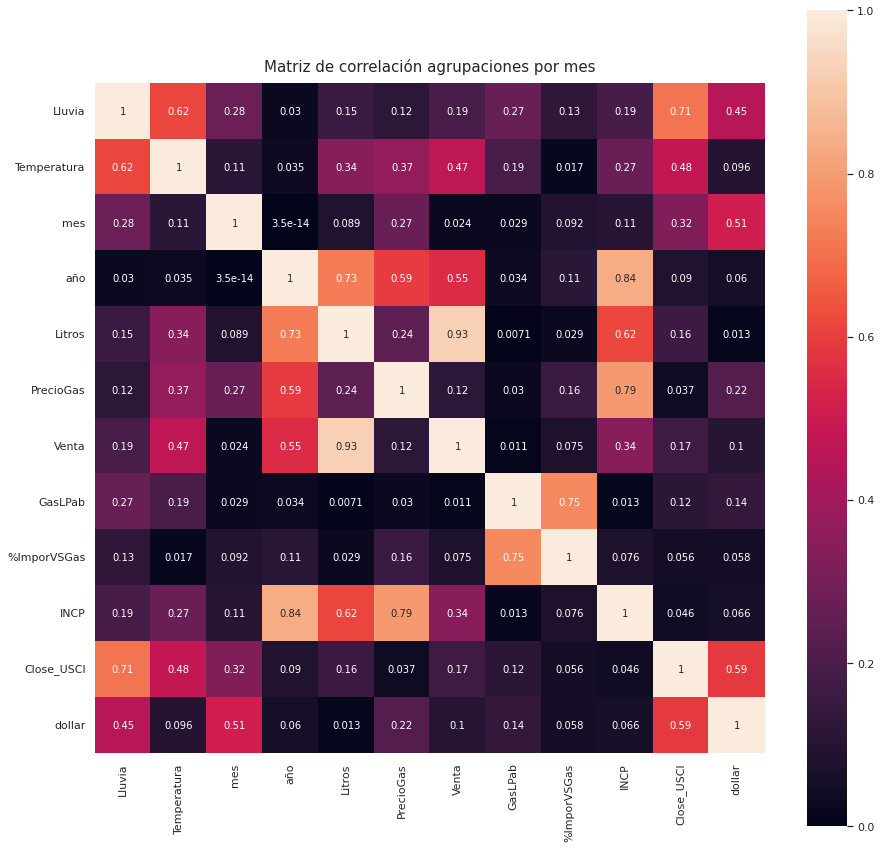

In [ ]:
corrmatI = abs(dataaII.corr())
f, ax = plt.subplots(figsize=(15, 15))
ht=sns.heatmap(corrmatI, vmin=0, vmax=1, square=True, annot=True);
ht.set_title('Matriz de correlación agrupaciones por mes', fontdict={'fontsize':15}, pad=12);

Otra forma de visualizar los datos es el siguiente formato

De la matriz de correlación se puede aislar ciertas variables que nos interesa conocer, en este caso la venta respecto a las variables propuestas a investigar:
Lluvia, Temperatura, el cierre de la materias primas, el precio de litros de gas, su porcentaje en importaciones, el cierre del precio del dollar, la lluvia, el indice del precio al consumidor y finalmente la temperatura. Esta tabla nos indica como se correlaciona las variables que se elgieron con las ventas.

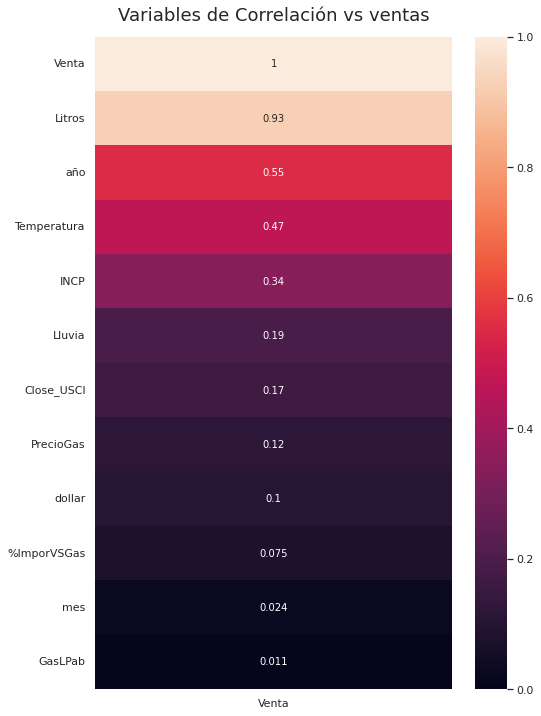

In [ ]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(corrmatI[['Venta']].sort_values(by='Venta', ascending=False), vmin=0, vmax=1, annot=True)
heatmap.set_title('Variables de Correlación vs ventas', fontdict={'fontsize':18}, pad=16);

**Se gráfica estas correlacione para después tomar el modelo predictivo que mejor se ajuste a los datos**

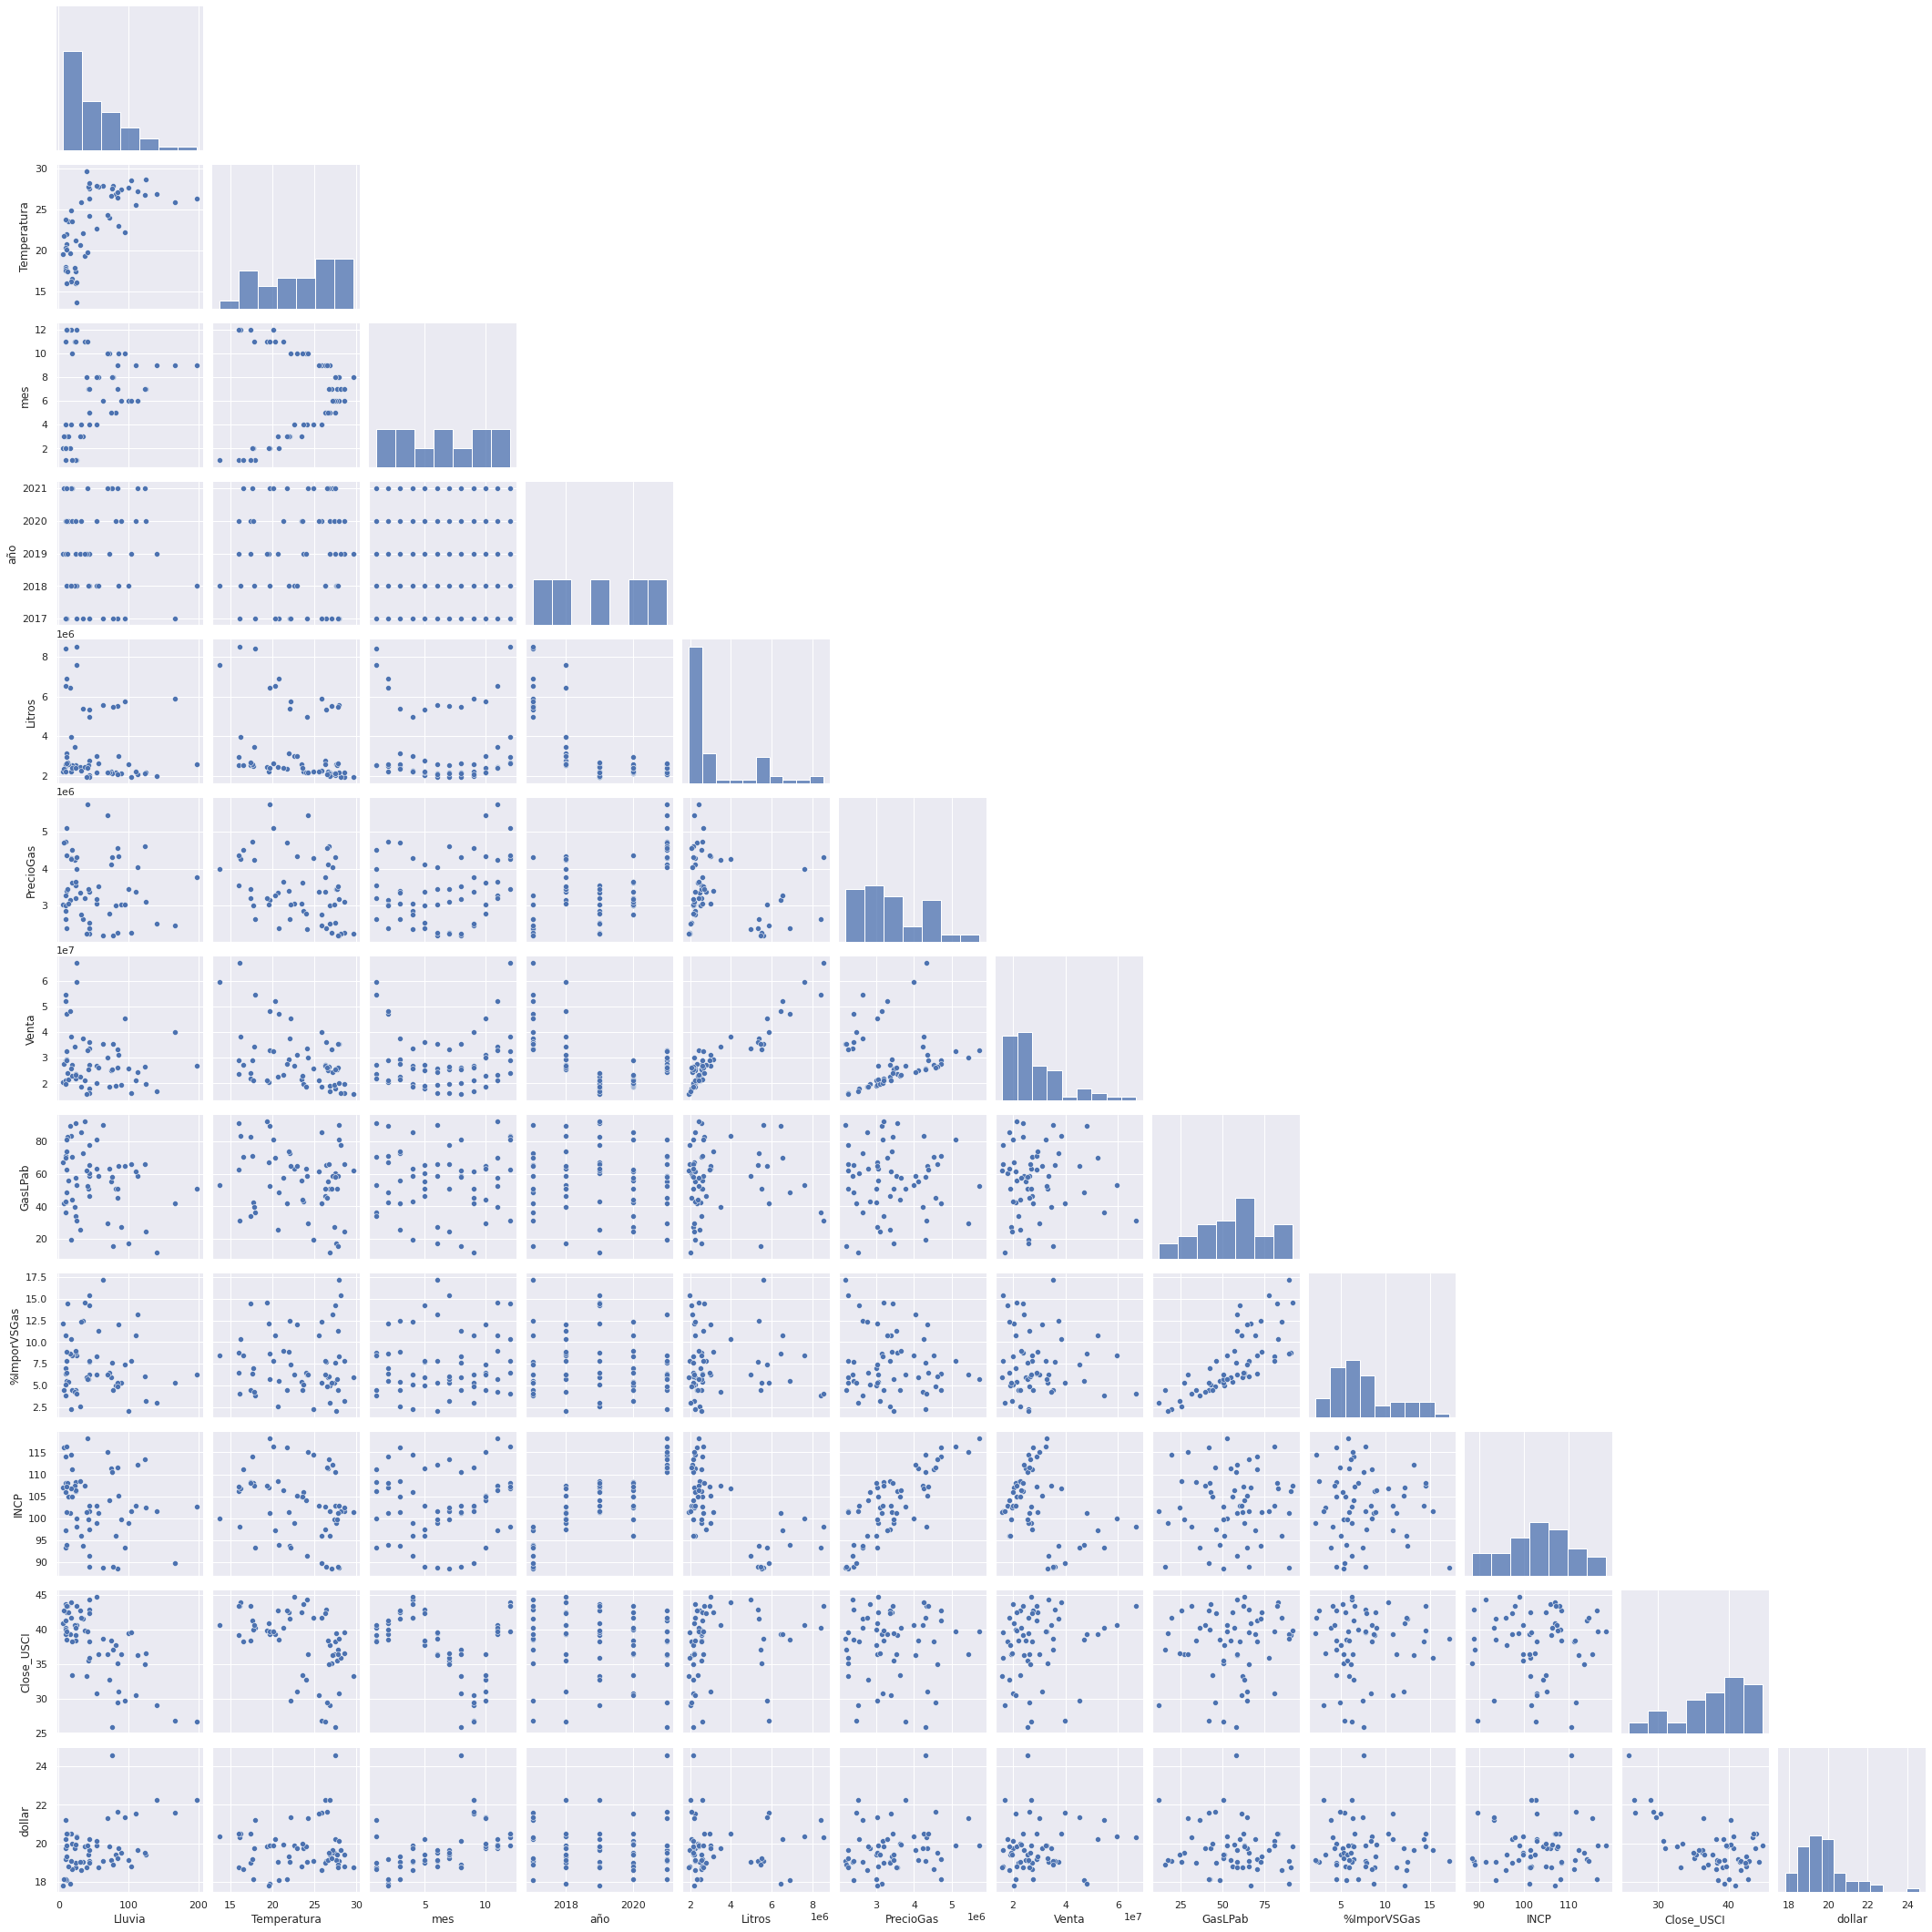

In [ ]:
sns.pairplot(dataaII,corner=True)

Conclusiones: Podemos ver las correlaciones entre las variables como se esperaba entre el precio del gas y las importaciones mensules, el precio de del dollar y el precio del producto al consumidor, sin embargo debido al tiempo no se pudieron realizar las predicciones respecto a estas variables, no obstante todas estas varibles pueden ser muy tentativas a estudio.

Todos los links de los datos se anexan:
https://smn.conagua.gob.mx/es/climatologia/temperaturas-y-lluvias/resumenes-mensuales-de-temperaturas-y-lluvias

https://sie.energia.gob.mx/bdiController.do?action=cuadro&cvecua=PMXE2C15

https://datos.gob.mx/busca/dataset/indice-nacional-de-precios-al-consumidor-inpc

https://finance.yahoo.com/quote/MXN%3DX/history?period1=1483228800&period2=1640908800&interval=1wk&filter=history&frequency=1wk&includeAdjustedClose=true

https://finance.yahoo.com/quote/USCI?p=USCI&.tsrc=fin-srch


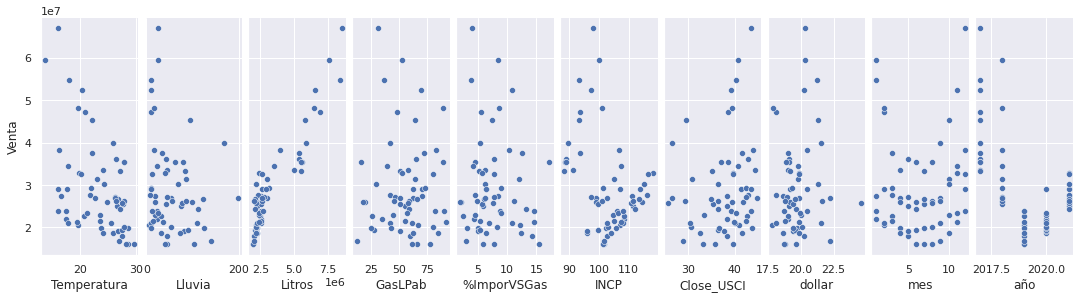

In [ ]:
pp = sns.pairplot(dataaII,y_vars=['Venta'],x_vars=['Temperatura', 'Lluvia', 'Litros','GasLPab','%ImporVSGas','INCP','Close_USCI','dollar','mes','año'])
pp.fig.set_size_inches(15,5)

In [ ]:
!jupyter nbconvert --to html '/content/drive/MyDrive/DATATHON_DSC/Correlaciones_filial_mensual.ipynb'

[NbConvertApp] Converting notebook /content/drive/MyDrive/DATATHON_DSC/Correlaciones_filial_mensual.ipynb to html
[NbConvertApp] Writing 1216390 bytes to /content/drive/MyDrive/DATATHON_DSC/Correlaciones_filial_mensual.html
